  0	[(0, 1.0)]	1.00000
  1	[(-1, 0.483), (1, 0.517)]	1.00000
  2	[(-2, 0.233), (0, 0.511), (2, 0.256)]	1.00000
  3	[(-3, 0.13), (-1, 0.36), (1, 0.381), (3, 0.129)]	1.00000
  4	[(-4, 0.07), (-2, 0.242), (0, 0.367), (2, 0.255), (4, 0.066)]	1.00000
  5	[(-5, 0.032), (-3, 0.16), (-1, 0.308), (1, 0.305), (3, 0.161), (5, 0.035)]	1.00000
  6	[(-6, 0.018), (-4, 0.095), (-2, 0.239), (0, 0.307), (2, 0.229), (4, 0.092), (6, 0.019)]	1.00000
  7	[(-7, 0.01), (-5, 0.056), (-3, 0.159), (-1, 0.289), (1, 0.262), (3, 0.159), (5, 0.055), (7, 0.01)]	1.00000
  8	[(-8, 0.005), (-6, 0.034), (-4, 0.104), (-2, 0.239), (0, 0.263), (2, 0.206), (4, 0.113), (6, 0.031), (8, 0.005)]	1.00000
  9	[(-9, 0.002), (-7, 0.02), (-5, 0.069), (-3, 0.177), (-1, 0.249), (1, 0.237), (3, 0.151), (5, 0.072), (7, 0.021), (9, 0.002)]	1.00000
 10	[(-10, 0.001), (-8, 0.011), (-6, 0.046), (-4, 0.123), (-2, 0.203), (0, 0.243), (2, 0.205), (4, 0.111), (6, 0.045), (8, 0.011), (10, 0.001)]	1.00000
 11	[(-11, 0.001), (-9, 0.006), (-7, 0.028

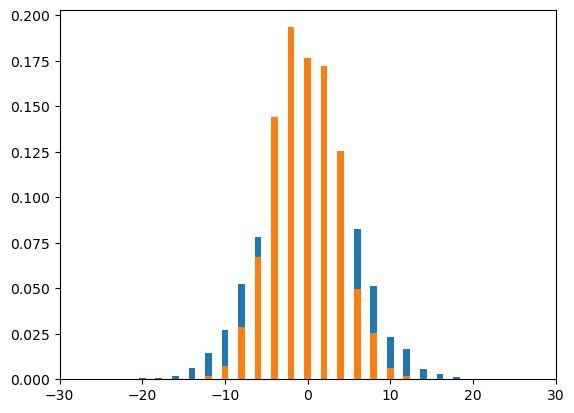

In [31]:
import random
import collections
import matplotlib.pyplot as plt

#test
def get_counts(input_list, num_walkers, power=1):
    """
    Get the weighted counts for unique elements in an input list using a given power and number of walkers.

    Arenas:
        input_list (List[int]): A list of integers representing data points.
        num_walkers (int): Number of walkers used to calculate weights.
        power (int): The exponent applied to the counts for calculating weighted values.

    Returns:
        List[Tuple[int, float]]: A sorted list of tuples containing unique elements from input_list and their normalized weighted counts.

    Example usage:
    ```python
    data = [1, 2, 3, 4, 5]
    walkers = 2
    power = 2

    print(get_counts(data, walkers, power)) # [(1, 0.06666666666666667), (2, 0.13333333333333333), ...]
    ```
    """
    counter = collections.Counter(input_list)
    norm = sum([counter[n]**power for n in counter])
    return sorted((val, counter[val]**power/norm) for val in set(input_list))

def count_values_classic(input_list, num_walkers):
    """
    Wrapper function that calls get_counts() with power set to 1 to compute the porbabilities in the classical framework

    Args:
        input_list (List[int]): A list of integers representing data points.
        num_walkers (int): Number of walkers used to calculate weights.

    Returns:
        List[Tuple[int, float]]: A sorted list of tuples containing unique elements from input_list and their weighted counts with power=1.

    Example usage:
    ```python
    data = [1, 2, 3, 4, 5]
    walkers = 2

    print(count_values_classic(data, walkers)) # [(1, 0.2), (2, 0.2), ...]
    ```
    """
    return get_counts(input_list, num_walkers, 1)

def count_values_qm(input_list, num_walkers):
    """
    Wrapper function that calls get_counts() with power set to 1 to compute the porbabilities in the QM framework


    Args:
        positions (list of list of ints): A list of position lists for all walkers at a specific step.
        num_walkers (int): The number of walkers in the simulation.

    Returns:
        tuple of tuples: Each inner tuple contains a value and its squared count across all walks, with power set equal to 2.
    """
    return get_counts(input_list, num_walkers, 2)

def random_walk(**kwargs):
    """
    1-Dimensional Random Walk simulation.

    :param num_steps: The number of steps to simulate (default: 100)
    :param start: Starting position (default: 0)
    :param num_walkers: Number of walkers (default: 100)
    :return: A list containing the random walk's coordinates in the format [x, index].
    """

    # Initialize walk with starting position
    # The steps of the walk are strings num_walker + 1 long where 
    num_steps=kwargs.get("num_steps",4)
    start=kwargs.get("start",0) 
    num_walkers=kwargs.get("num_walkers",10000)

    walk = [[0]+[ start for _ in range(num_walkers)]]

    for k in range(1, num_steps + 1):
        #start a new step
        walk.append([k])
        for walker in range(1, num_walkers+1):
            # Append new position (x and index) the current step of the walk is in walk[-1]
            walk[-1].append(walk[-2][walker] + random.choice([-1, 1]))

    return walk

# Example usage:
num_walkers=3000
num_steps=30
for step in random_walk(num_steps=num_steps,start=0,num_walkers=num_walkers):
    RW=count_values_classic(step[1:],num_walkers)
    P_sum=sum([node[1] for node in RW]) #check if sum of prob is 1
    rounded_RW = [(k, round(v,3)) for k, v in RW]
    print("{:3}\t{}\t{:1.5f}".format(step[0],rounded_RW,P_sum))

# unzip the list of tuple (value, counts) in two lists
values,counts=zip(*RW)

for step in random_walk(num_steps=num_steps,start=0,num_walkers=num_walkers):
    qm_RW=count_values_qm(step[1:],num_walkers)
    P_sum=sum([node[1] for node in qm_RW])
    # Round qm_RW to limit number of digits
    rounded_QM_RW = [(k, round(v,3)) for k, v in qm_RW]
    print("{:3}\t{}\t{:1.5f}".format(step[0],rounded_QM_RW,P_sum))

# unzip the list of tuple (value, counts) in two lists
values_qm,counts_qm=zip(*qm_RW)


plt.bar(values, counts)
plt.bar(values_qm, counts_qm)
plt.xlim(-(num_steps), num_steps)
plt.show()


In [7]:
phases=((0,1),(1,0),(-1,0),(0,-1))
for _ in range(10):
    index=random.randint(0,50)
    print(index,phases[index%(len(phases))])
    

16 (0, 1)
7 (0, -1)
45 (1, 0)
9 (1, 0)
6 (-1, 0)
40 (0, 1)
25 (1, 0)
34 (-1, 0)
14 (-1, 0)
20 (0, 1)


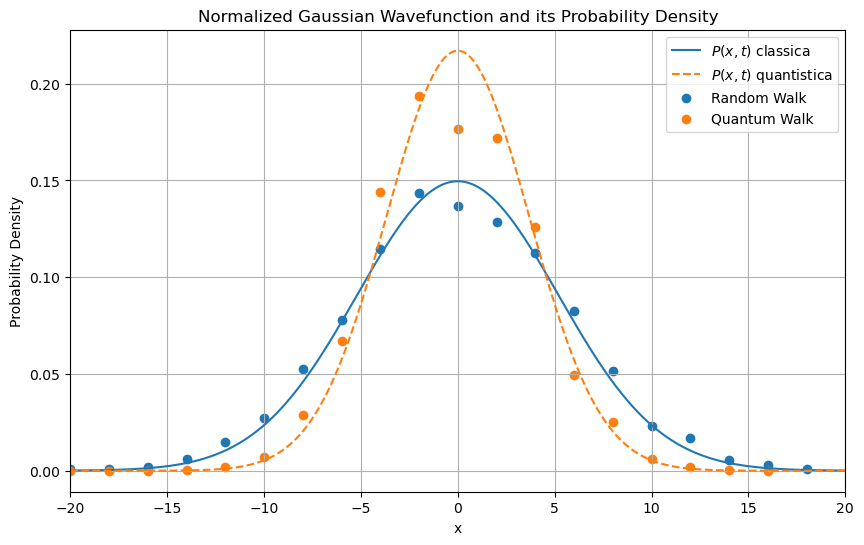

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parametri per la funzione gaussiana
sigma = 5.2
mu = 0.0

# Funzione d'onda gaussiana
def psi_gaussian(x):
    return (3.8/(sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Funzione per calcolare l'integrale della funzione d'onda gaussiana
def psi_gaussian_normalized(x):
    return psi_gaussian(x)

# Funzione per calcolare l'integrale della densità di probabilità gaussiana
def psi_squared_gaussian_normalized(x):
    return np.abs(psi_gaussian(x))**2

# Calcolare il fattore di normalizzazione per la funzione d'onda gaussiana
integral_psi_gaussian, _ = quad(psi_gaussian_normalized, -np.inf, np.inf)
integral_psi_squared_gaussian, _ = quad(psi_squared_gaussian_normalized, -np.inf, np.inf)

# Definire l'intervallo per il plot tra -4 e 4
x_zoomed = np.linspace(-20, 20, 1000)

# Calcolare i valori della funzione d'onda e della densità di probabilità
psi_gaussian_values = psi_gaussian(x_zoomed)
psi_squared_gaussian_values = 2*np.abs(psi_gaussian_values)**2

# Normalizzare la funzione d'onda gaussiana e la sua densità di probabilità
psi_gaussian_values_normalized = psi_gaussian_values / np.sqrt(integral_psi_gaussian)
psi_squared_gaussian_values_normalized = psi_squared_gaussian_values / integral_psi_squared_gaussian

# Plot delle funzioni normalizzate
plt.figure(figsize=(10, 6))

# Plot della gaussiana normalizzata
plt.plot(x_zoomed, psi_gaussian_values_normalized, label='$P(x,t)$ classica')

# Plot della gaussiana al quadrato normalizzata
plt.plot(x_zoomed, psi_squared_gaussian_values_normalized, label='$P(x,t)$ quantistica', linestyle='dashed')

plt.scatter(values, counts, label='Random Walk')
plt.scatter(values_qm, counts_qm,label='Quantum Walk')
plt.xlim(-20, 20)

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normalized Gaussian Wavefunction and its Probability Density')
plt.legend()
plt.grid(True)
plt.show()


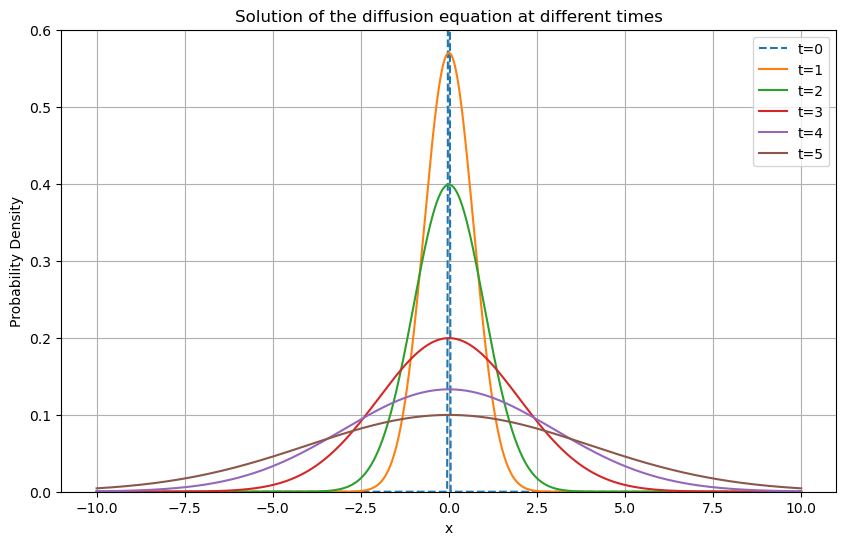

In [8]:
# Define the range for x
x = np.linspace(-10, 10, 1000)

# Define the means and standard deviations
sigma_values = [0.7, 1, 2, 3, 4]
mu = 0

# Create the Gaussians
gaussians = [1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)) for sigma in sigma_values]

# Define the Dirac delta function as a very narrow Gaussian
delta_sigma = 0.01
dirac_delta = 1/(delta_sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * delta_sigma**2))


# Plot the Dirac delta

plt.figure(figsize=(10, 6))
plt.plot(x, dirac_delta, label='t=0', linestyle='dashed')

# Plot the Gaussians
j=1
for i, sigma in enumerate(sigma_values):
    plt.plot(x, gaussians[i], label=f't='+str(j))
    j+=1



# Add labels and legend
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.ylim(0,0.6)
plt.title('Solution of the diffusion equation at different times')
plt.legend()
plt.grid(True)
plt.show()



In [17]:
print(random_walk(num_steps=num_steps,start=0,num_walkers=num_walkers)[-1])

[30, 28, 28, 28, 28, 26, 24, 20, 24, 22, 24, 20, 14, 16, 18, 20, 16, 18, 12, 10, 8, 14, 2, 10, 14, 2, 8, 6, -8, -4, -4, 2, -10, 8, -2, 8, 6, 8, 0, -14, 12, 10, -4, -8, -12, -2, -2, -2, -8, 8, 0, 0, 0, 6, -8, -2, -8, -2, -4, -6, -6, -2, 4, 2, 4, -2, -4, 2, -6, 6, 6, 12, 0, -2, -4, 6, 10, 8, -2, -4, 8, -10, 0, -6, -2, 4, -16, -2, 8, 2, -10, -6, -14, 0, -4, 8, 2, 4, 6, 8, 4, -6, -2, 2, 6, 2, 6, 0, 4, -4, 12, -2, -4, 0, -4, 0, -2, 0, 2, 2, 6, 4, 0, -4, 2, -2, 2, -4, -4, -6, 8, 4, -10, -14, 2, 2, -4, 2, 2, -2, 0, 2, -6, -2, -4, -8, -8, 6, 0, 6, -10, 4, 10, 4, -2, -4, 0, -2, -4, 4, -6, -2, 2, -8, -8, 2, -4, -8, 2, 0, 0, 14, 0, 14, 8, 2, 4, 0, 6, -6, -8, -6, -2, 6, -4, -6, -4, -4, 0, -4, -8, -8, 4, -4, 2, 0, 2, 0, -2, 2, -8, 2, 6, 0, 8, 2, -8, 6, -4, 6, 6, 0, 2, 4, -2, 2, 4, -6, -6, -8, 8, 10, 4, -4, -12, 6, -2, -2, -2, -4, -8, 6, -2, 16, 6, 6, -6, 2, 4, -6, -12, 10, -8, 0, 6, 0, 4, -10, -6, 2, -6, -10, 0, -6, 0, 4, 4, 0, 6, 4, 6, -10, 10, -6, 0, -4, -4, -4, 4, 2, -4, -4, 0, 2, -4, -6, 6, -8,